In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('netflix.csv')
df.dropna()
df


,Date,High,Low,Open,Close,Volume,Adj Close
0,23-05-2002,1.242857,1.145714,1.156429,1.196429,104790000,1.196429
1,24-05-2002,1.225000,1.197143,1.214286,1.210000,11104800,1.210000
2,28-05-2002,1.232143,1.157143,1.213571,1.157143,6609400,1.157143
3,29-05-2002,1.164286,1.085714,1.164286,1.103571,6757800,1.103571
4,30-05-2002,1.107857,1.071429,1.107857,1.071429,10154200,1.071429
...,...,...,...,...,...,...,...
4899,05-11-2021,663.969971,665.640015,645.010010,645.719971,5283500,645.719971
4900,08-11-2021,650.289978,656.000000,643.789978,651.450012,2887500,651.450012
4901,09-11-2021,653.700012,660.500000,650.520020,655.989990,2415600,655.989990
4902,10-11-2021,653.010010,660.330017,642.109985,646.909973,2405800,646.909973


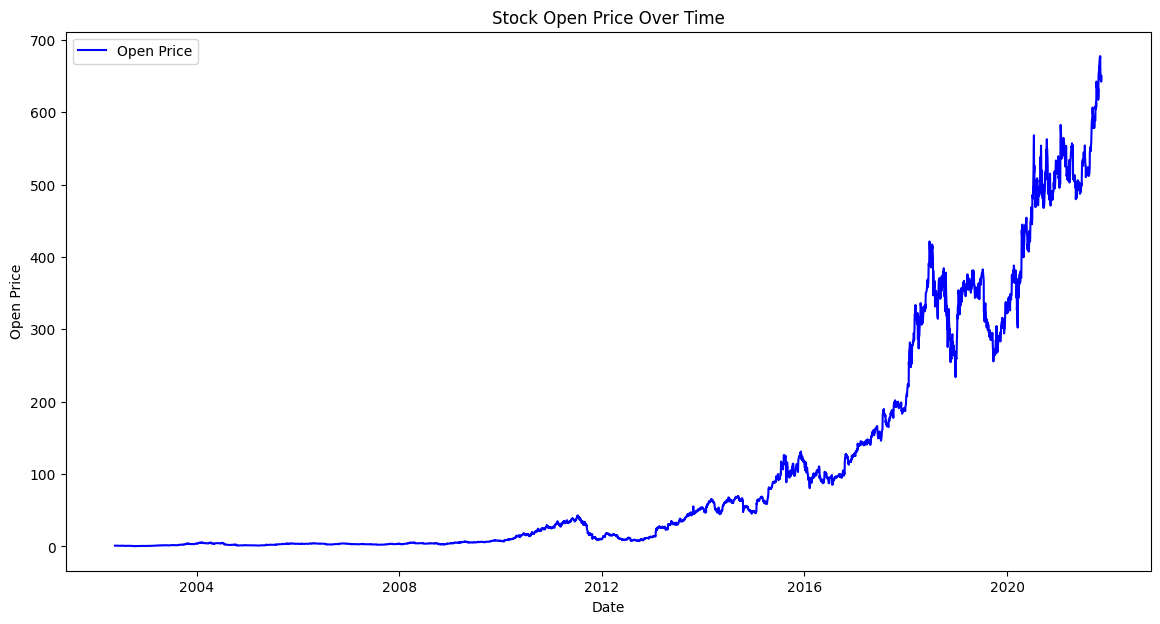

array([[  1.15642905],
       [  1.21428597],
       [  1.21357095],
       ...,
       [650.52002   ],
       [642.109985  ],
       [649.710022  ]])

In [2]:
df = pd.read_csv('netflix.csv', parse_dates=['Date'],dayfirst=True)
df.set_index('Date', inplace=True)
# Plotting the 'Open' price
plt.figure(figsize=(14, 7))
plt.plot(df['Open'], color='blue', label='Open Price')
plt.title('Stock Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

training_set=df.iloc[:,2:3].values
training_set
#training_set.shape,df.shape

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.00115022],
       [0.00123569],
       [0.00123463],
       ...,
       [0.96048115],
       [0.94805667],
       [0.95928451]])

In [4]:
import numpy as np
x_train=[]
y_train=[]
for i in range(60,4904):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

x_train



array([[1.15021579e-03, 1.23569014e-03, 1.23463381e-03, ...,
        5.87770108e-04, 6.78521675e-04, 7.60830223e-04],
       [1.23569014e-03, 1.23463381e-03, 1.16182320e-03, ...,
        6.78521675e-04, 7.60830223e-04, 8.08316364e-04],
       [1.23463381e-03, 1.16182320e-03, 1.07845833e-03, ...,
        7.60830223e-04, 8.08316364e-04, 8.96956779e-04],
       ...,
       [7.60626524e-01, 7.60966284e-01, 7.67658678e-01, ...,
        9.82611676e-01, 9.52340991e-01, 9.50538588e-01],
       [7.60966284e-01, 7.67658678e-01, 7.71706576e-01, ...,
        9.52340991e-01, 9.50538588e-01, 9.60481150e-01],
       [7.67658678e-01, 7.71706576e-01, 8.04725183e-01, ...,
        9.50538588e-01, 9.60481150e-01, 9.48056667e-01]])

In [5]:
x_train.shape


(4844, 60)

In [6]:
x_train=x_train.reshape(4844,60,1)

In [7]:
x_train.shape

(4844, 60, 1)

C:\Users\NAIMUR RAHAMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 60)              │          14,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 60)              │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,641 (725.16 KB)

 Trainable params: 185,641 (725.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 25s 113ms/step - loss: 0.0286
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - loss: 0.0015
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - loss: 0.0012
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.0014
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.0013
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - loss: 0.0014
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - loss: 9.6339e-04
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - loss: 0.0011
Epoch 9/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - loss: 0.0011
Epoch 10/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - loss: 0.0011
Epoch 11/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - loss: 0.0013
Epoch 12/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 9.5826e-04
Epoch 13/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - loss: 8.2119e-04
Epoch 14/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - lo

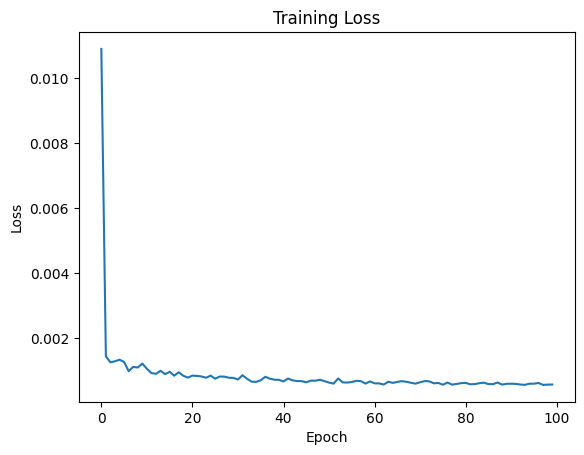

In [8]:
#building LSTM
import tensorflow as tf

#defining an object(initiating RNN)
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True,input_shape=(60,1)))
#dropout layer
model.add(tf.keras.layers.Dropout(0.2))

#second lstm layer
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True))     

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))

#third lstm layer
model.add(tf.keras.layers.LSTM(units=80,activation='relu',return_sequences=True))      

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))

#fourth lstm layer
model.add(tf.keras.layers.LSTM(units=120,activation='relu'))     

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))
          
#output layer
model.add(tf.keras.layers.Dense(units=1))

model.summary()

model.compile(optimizer='adam' , loss='mean_squared_error' )
history=model.fit(x_train,y_train,batch_size=32,epochs=100)
# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [9]:

#making predictions
test_data=pd.read_csv('test_data.csv')

test_data.shape
#test_data

#concatenation
dataset_total=pd.concat([df['Open'], test_data['Open']], axis=0)

inputs=dataset_total[len(dataset_total)-len(test_data)-60:].values
inputs

array([522.7399902, 545.0900269, 545.9799805, 551.4799805, 550.1599731,
       546.1599731, 551.5999756, 557.25     , 566.1199951, 569.       ,
       583.6799927, 585.7999878, 594.6900024, 603.8400269, 606.4699707,
       598.1599731, 598.5700073, 584.8900146, 578.1699829, 584.2999878,
       587.8499756, 586.789978 , 578.3099976, 579.6900024, 590.789978 ,
       592.5      , 587.9500122, 589.       , 589.0100098, 608.0499878,
       604.2399902, 613.3900146, 606.9400024, 628.1799927, 642.2299805,
       634.1699829, 633.2000122, 621.98999  , 622.099976 , 626.789978 ,
       625.159973 , 620.590027 , 632.299988 , 617.150024 , 628.650024 ,
       651.809998 , 657.070007 , 662.77002  , 661.849976 , 668.030029 ,
       671.23999  , 676.539978 , 673.820007 , 677.27002  , 665.5      ,
       645.01001  , 643.789978 , 650.52002  , 642.109985 , 649.710022 ,
       660.01001  , 681.23999  , 678.27002  , 690.       , 691.609985 ,
       692.349976 , 676.02002  , 658.179993 , 658.01001  , 675. 

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step
Mean Squared Error for prediction 1: 8704.546077729887
Mean Squared Error for prediction 2: 8528.326390851975
Mean Squared Error for prediction 3: 8020.63232742436
Mean Squared Error for prediction 4: 9586.303035855719
Mean Squared Error for prediction 5: 7092.098747891756
Mean Squared Error for prediction 6: 6964.281428786197
Mean Squared Error for prediction 7: 4471.237026483897
Mean Squared Error for prediction 8: 3039.9770241274246
Mean Squared Error for prediction 9: 2998.3578230169605
Mean Squared Error for prediction 10: 5513.751342826488
Mean Squared Error for prediction 11: 4402.456919387399
Mean Squared Error for prediction 12: 5332.600722798383
Mean Squared Error for prediction 13: 2572.713604377923
Mean Squared Error for prediction 14: 547.6553929746665
Mean Squared Error for prediction 15: 936.6386779583991
Mean Squared Error for prediction 16: 936.4780391557591
Mean Squared Error for prediction 17: 2517.308944578453
Mean Squared Erro

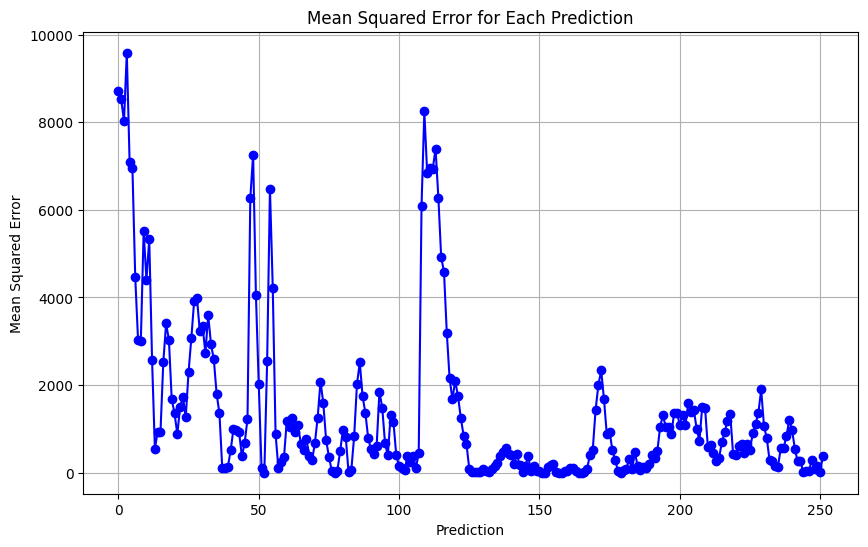

In [10]:
from sklearn.metrics import mean_absolute_percentage_error
#concatenation
dataset_total=pd.concat([df['Open'], test_data['Open']], axis=0)

dataset_total
#stock prices of last 60 days 
inputs=dataset_total[len(dataset_total)-len(test_data)-60:].values

#reshape convert into numpy array
inputs=inputs.reshape(-1,1)

#feature scaling
inputs=sc.transform(inputs)

#creating test set
x_test=[]
for i in range(60,312):
    x_test.append(inputs[i-60:i,0])

#convert in numpy rray
x_test=np.array(x_test)

#convert in 3D(required to process)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

stock_price=test_data.iloc[:,2:3].values
stock_price.shape
#prediction making
predicted_price=model.predict(x_test)
predicted_price_scaled = sc.inverse_transform(predicted_price)

# Evaluate the model
# Calculate and print MSE for each value
individual_mse = (predicted_price_scaled - stock_price.reshape(-1, 1))**2

for i, mse_value in enumerate(individual_mse):
    print(f"Mean Squared Error for prediction {i+1}: {mse_value[0]}")

mape = mean_absolute_percentage_error(stock_price, predicted_price_scaled)

# Calculate accuracy percentage
accuracy_percentage = 100 - (mape * 100)
print(f"Model Accuracy: {accuracy_percentage:.2f}%")
# Plot MSE values
# Plot MSE values
plt.figure(figsize=(10, 6))
plt.plot(individual_mse, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error for Each Prediction')
plt.xlabel('Prediction')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()




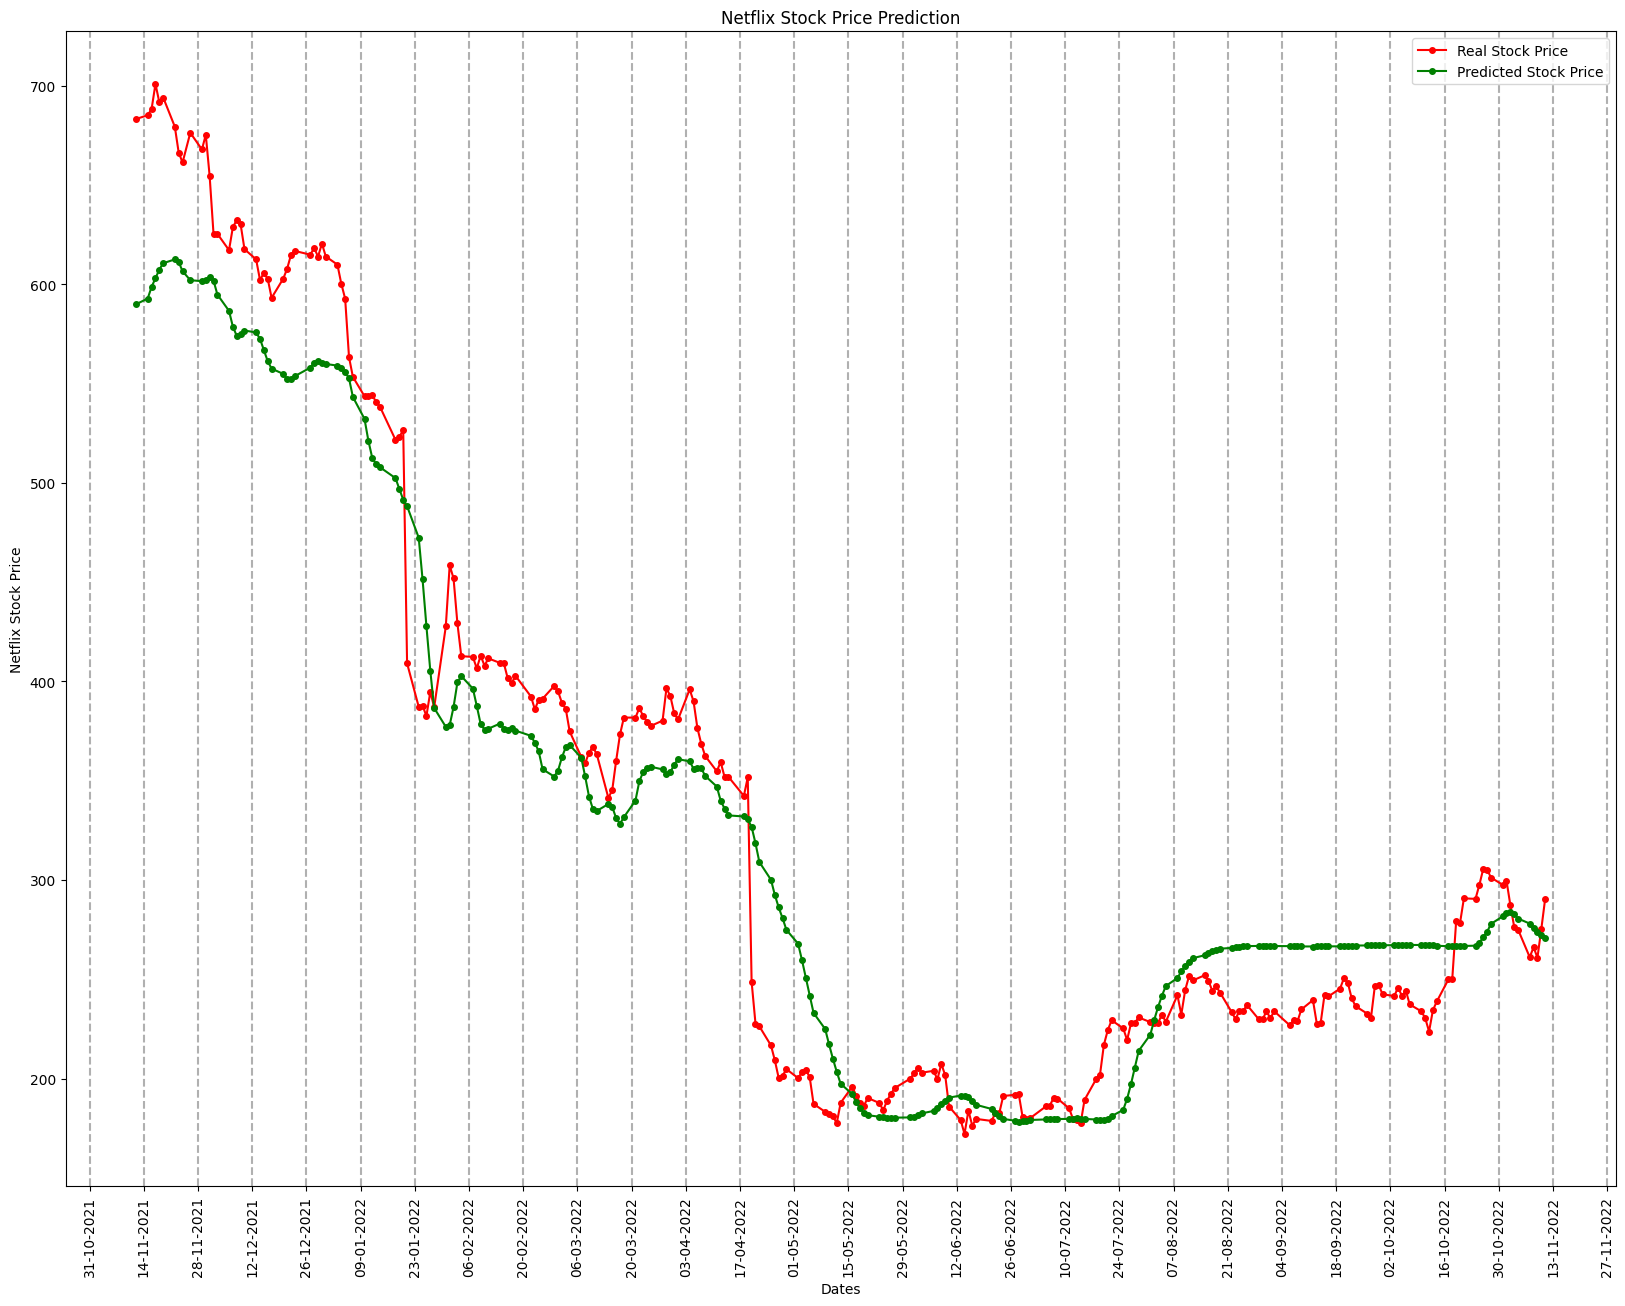

In [11]:
import matplotlib.dates as mdates


test_data=pd.read_csv('test_data.csv',parse_dates=['Date'])
test_data.set_index('Date', inplace=True)
#Visualising the results
plt.figure(figsize=(20, 15))
plt.plot(test_data.index,stock_price,color='red',label='Real Stock Price',linestyle='-', marker='o', markersize=4)
plt.plot(test_data.index,predicted_price_scaled,color='green',label='Predicted Stock Price',linestyle='-', marker='o', markersize=4)
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Netflix Stock Price')

plt.xticks(rotation=90)
# Enable the grid and draw vertical grid lines

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=1.5)
plt.legend()
plt.show()